In this notebook, we will carry out the championship match transformations using the previously trained and selected models for each feature and each season.  These are simple linear models with one variable, so it is simple to apply them using the intercept and coefficient from the trained models.

To reproduce the steps in this notebook:
1. make sure the steps from the previous notebooks have been followed first
1. run "make championship_transformation" in a terminal opened at the location of the repository
    * this will carry out the match transformations & generate a single combined dataset of premier and premier equivalent championship matches

In [1]:
# common notebook config
%run notebook-config.ipynb

autoreload enabled
numpy imported as np (1.19.5)
pandas imported as pd (1.2.1)
Pandas display: Remove maximum column width
Pandas display: Show up to 100 columns in tables
Pandas display: Show up to 100 rows in tables
Pandas display: Set floats to show up to 3 decimal places
matplotlib: show plots inline
matplotlib imported as mpl (3.3.3)
matplotlib.pyplot imported as plt
matplotlib: use ggplot style
seaborn: set white grid theme
Logging: show log messages in ipython


In [2]:
from src.models import championship_transformation

In [3]:
interim_filepath = "../data/interim"
models_filepath = "../models"
processed_filepath = "../data/processed"

## Transform matches

1. Duplicate championship matches in to home & away with the opponent name appended with "(Premier)".  This is to indicate that this opponent does not really exist and is just an estimation of how the team may play against a premier league level opponent.
2. Transform feature values using selected models for each season from previous notebook
3. Combine transformed championship matches with premier matches to form a single combined dataset

In [4]:
championship_transformation.transform_championship_matches(interim_filepath, models_filepath, processed_filepath)

Transforming championship matches...
Preprocessing ready for transformation...
Transforming...
Saved file: ../data/processed/premier_equivalent_matches.csv
Transformed championship matches!


## Check transformed matches

Sanity check the transformed matches by looking for null values and checking the distribution of values.

In [5]:
all_matches = pd.read_csv("{}/premier_equivalent_matches.csv".format(processed_filepath))

championship_matches = all_matches[
    (all_matches.division == "championship")
]

print("Number of championship matches: {}".format(championship_matches.shape[0]))
print("Number of match columns: {}".format(championship_matches.shape[1]))

Number of championship matches: 20508
Number of match columns: 41


In [6]:
# Check for null values
championship_matches.isnull().sum()

date                              0
home_team                         0
away_team                         0
result                            0
odds_interwetten_homeWin      20508
odds_interwetten_draw         20508
odds_interwetten_awayWin      20508
odds_williamHill_homeWin      20508
odds_williamHill_draw         20508
odds_williamHill_awayWin      20508
league                            0
season                            0
division                          0
home_goals_for                    0
home_goals_against                0
away_goals_for                    0
away_goals_against                0
home_shots_for                    0
home_shots_against                0
away_shots_for                    0
away_shots_against                0
home_shotsOnTarget_for            0
home_shotsOnTarget_against        0
away_shotsOnTarget_for            0
away_shotsOnTarget_against        0
home_corners_for                  0
home_corners_against              0
away_corners_for            

In [7]:
# Drop empty columns - i.e. bookmaker odds which are no longer relevant on transformed championship matches
championship_matches = championship_matches.dropna(axis="columns")

championship_matches.describe()

,season,home_goals_for,home_goals_against,away_goals_for,away_goals_against,home_shots_for,home_shots_against,away_shots_for,away_shots_against,home_shotsOnTarget_for,home_shotsOnTarget_against,away_shotsOnTarget_for,away_shotsOnTarget_against,home_corners_for,home_corners_against,away_corners_for,away_corners_against,home_fouls_for,home_fouls_against,away_fouls_for,away_fouls_against,home_yellowCards_for,home_yellowCards_against,away_yellowCards_for,away_yellowCards_against,home_redCards_for,home_redCards_against,away_redCards_for,away_redCards_against
count,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000,20508.000
mean,2010.795,1.481,1.142,1.142,1.481,13.519,10.734,10.734,13.519,6.218,4.868,4.868,6.218,6.133,4.895,4.895,6.133,11.501,11.949,11.949,11.501,1.320,1.674,1.674,1.320,0.066,0.108,0.108,0.066
std,5.366,0.565,0.248,0.248,0.565,3.131,2.418,2.418,3.131,2.203,1.515,1.515,2.203,0.712,0.812,0.812,0.712,1.505,1.832,1.832,1.505,0.166,0.226,0.226,0.166,0.044,0.048,0.048,0.044
min,2002.000,0.052,0.699,0.699,0.052,2.486,-0.386,-0.386,2.486,-0.977,-0.106,-0.106,-0.977,1.705,0.022,0.022,1.705,4.661,2.193,2.193,4.661,0.848,0.608,0.608,0.848,0.020,0.036,0.036,0.020
25%,2006.000,1.263,0.914,0.914,1.263,11.253,9.105,9.105,11.253,5.113,4.175,4.175,5.113,5.656,4.433,4.433,5.656,10.421,10.765,10.765,10.421,1.211,1.620,1.620,1.211,0.053,0.096,0.096,0.053
50%,2011.000,1.557,1.123,1.123,1.557,13.372,10.425,10.425,13.372,5.895,4.614,4.614,5.895,6.088,4.673,4.673,6.088,11.316,11.730,11.730,11.316,1.325,1.665,1.665,1.325,0.053,0.105,0.105,0.053
75%,2015.000,1.842,1.376,1.376,1.842,15.219,12.263,12.263,15.219,7.928,5.769,5.769,7.928,6.659,5.271,5.271,6.659,12.596,13.564,13.564,12.596,1.408,1.686,1.686,1.408,0.064,0.123,0.123,0.064
max,2020.000,5.061,1.464,1.464,5.061,34.496,26.023,26.023,34.496,16.631,14.667,14.667,16.631,11.232,13.643,13.643,11.232,20.576,22.356,22.356,20.576,2.664,4.900,4.900,2.664,0.734,1.329,1.329,0.734


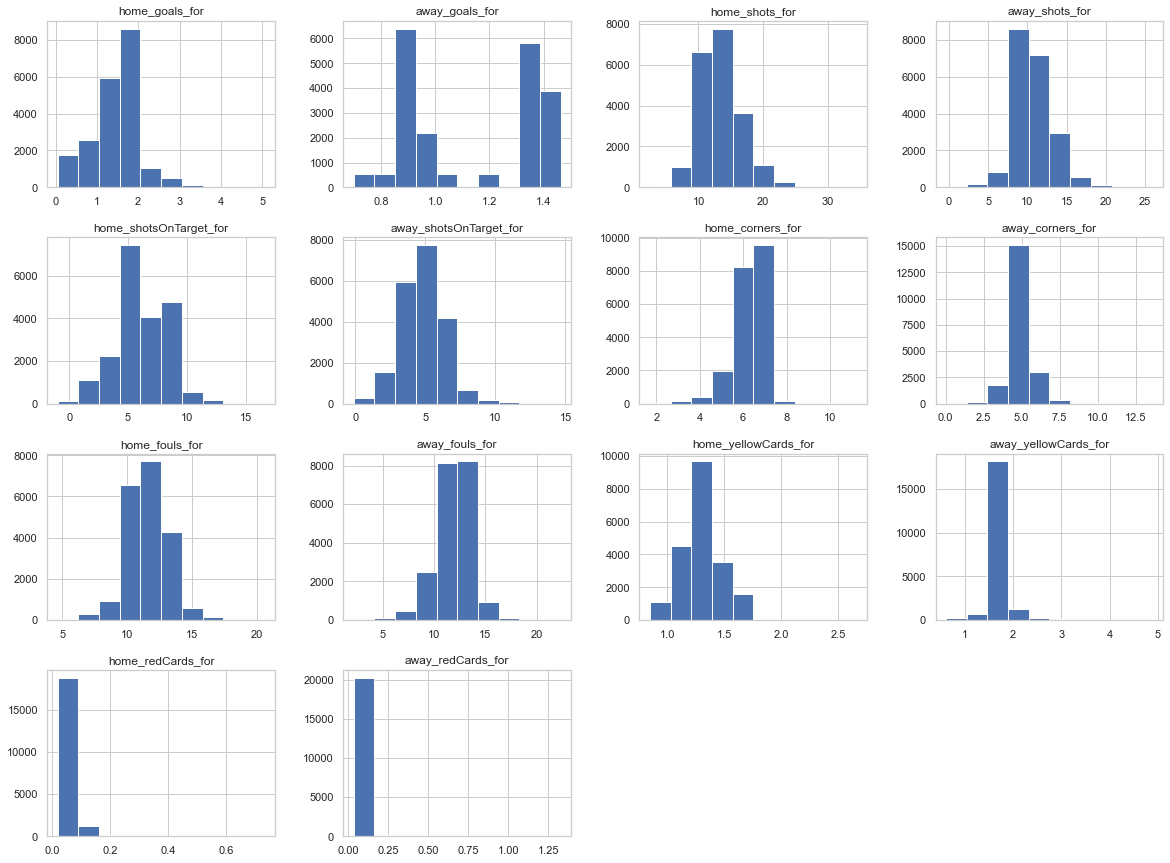

In [8]:
# inspect distribution of transformed features

# just show "for" columns because the "against" are duplicated values for the opponent
columns = [col for col in championship_matches if col.endswith("_for")]

championship_matches[columns].hist(figsize=(20,15))
plt.show()